In [1]:
®# If need to install calmap - calendar heatmap library, and pandas_profiling - streamlines exploratory data analysis
# pip install calmap
# pip install pandas_profiling
# pip install pydantic-settings
# pip install ydata-profiling
# pip install --upgrade jupyter
# pip install --upgrade ipywidgets



<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import warnings
from ydata_profiling import ProfileReport


Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [85]:
df = pd.read_csv("supermarket_sales.csv")

In [86]:
df.head(10)
# or can see the last 10 rows df.tail(10)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   
6  355-53-5943      A     Yangon        Member  Female   
7  315-22-5665      C  Naypyitaw        Normal  Female   
8  665-32-9167      A     Yangon        Member  Female   
9  692-92-5582      B   Mandalay        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   
5  Electronic accessories       85.39       7.0  29.8865  627.6165  3/25/19   
6                     NaN       68.84       6.0  20.6520  433.6920  2/25/19   
7                     NaN       73.56      10.0  36.7800  772.3800  2/24/19   
8                     NaN       36.26       2.0   3.6260   76.1460  1/10/19   
9                     NaN       54.84       3.0   8.2260  172.7460  2/20/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3  
5  18:30      Ewallet  597.73                 4.761905       29.8865     4.1  
6  14:36      Ewallet  413.04                 4.761905       20.6520     5.8  
7  11:38      Ewallet  735.60                 4.761905       36.7800     8.0  
8  17:15  Credit card   72.52                 4.761905        3.6260     7.2  
9  13:27  Credit card  164.52                 4.761905        8.2260     5.9

In [87]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [88]:
df.dtypes
# to see the data types of each column

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [89]:
df['Date'] 

0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object

We notice the date is of object, not of date type

In [90]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%y")

In [91]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [92]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

We can see the Date column changed to datetime64[ns]

Next: Some prefer to set date as index, but if we have multiple entries for same date, we might have to resolve this, so let's skip this for now

But let's verify if there are multiple entries per date using pandas sort_values()


In [27]:
# df.set_index('Date', inplace=True)
dated_df = df.sort_values(by=["Date"])

In [28]:
dated_df.head()

Invoice ID Branch       City Customer type  Gender  \
496  556-97-7101      C  Naypyitaw        Normal  Female   
245  530-90-9855      A     Yangon        Member    Male   
970  746-04-1077      B   Mandalay        Member  Female   
856  770-42-8960      B   Mandalay        Normal    Male   
839  271-77-8740      C  Naypyitaw        Member  Female   

               Product line  Unit price  Quantity  Tax 5%    Total       Date  \
496  Electronic accessories       63.22       2.0   6.322  132.762 2019-01-01   
245      Home and lifestyle       47.59       8.0  19.036  399.756 2019-01-01   
970      Food and beverages       84.63       NaN  42.315  888.615 2019-01-01   
856      Food and beverages       21.12       8.0   8.448  177.408 2019-01-01   
839       Sports and travel       29.22       6.0   8.766  184.086 2019-01-01   

      Time      Payment    cogs  gross margin percentage  gross income  Rating  
496  15:51         Cash  126.44                 4.761905         6.322     8.5  
245  14:47         Cash  380.72                 4.761905        19.036     5.7  
970  11:36  Credit card  846.30                 4.761905        42.315     9.0  
856  19:31         Cash  168.96                 4.761905         8.448     6.3  
839  11:40      Ewallet  175.32                 4.761905         8.766     5.0

Now we can do some quick summary statistics about the columns

In [29]:
df.describe()

Unit price    Quantity       Tax 5%        Total  \
count  996.000000  983.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   
min     10.080000    1.000000     0.508500    10.678500   
25%     33.125000    3.000000     5.894750   123.789750   
50%     55.420000    5.000000    12.096000   254.016000   
75%     78.085000    8.000000    22.539500   473.329500   
max     99.960000   10.000000    49.650000  1042.650000   
std     26.510165    2.924673    11.715192   246.019028   

                                Date         cogs  gross margin percentage  \
count                           1003  1003.000000             1.003000e+03   
mean   2019-02-14 00:18:39.840478464   308.007358             4.761905e+00   
min              2019-01-01 00:00:00    10.170000             4.761905e+00   
25%              2019-01-24 00:00:00   117.895000             4.761905e+00   
50%              2019-02-13 00:00:00   241.920000             4.761905e+00   
75%              2019-03-08 00:00:00   450.790000             4.761905e+00   
max              2019-03-30 00:00:00   993.000000             4.761905e+00   
std                              NaN   234.303836             6.131488e-14   

       gross income       Rating  
count   1003.000000  1003.000000  
mean      15.400368     6.972682  
min        0.508500     4.000000  
25%        5.894750     5.500000  
50%       12.096000     7.000000  
75%       22.539500     8.500000  
max       49.650000    10.000000  
std       11.715192     1.717647

Notes to keep in mind, of the quantitiy values:

1) Unit Price's count doesn't match the 1003 entries. missing 7?
2) Quantity - missing 20

Might these affect our analysis? How should we deal with these?

Let's first explore what they are

Let's see if we can find what happened by sorting the data frame

In [30]:
quantity_df = df.sort_values(by=["Quantity"])
quantity_df.tail(21)

Invoice ID Branch       City Customer type  Gender  \
491   510-09-5628      A     Yangon        Member  Female   
879   761-49-0439      B   Mandalay        Member  Female   
880   490-95-0021      B   Mandalay           NaN  Female   
881   115-38-7388      C  Naypyitaw           NaN  Female   
882   311-13-6971      B   Mandalay           NaN    Male   
883   291-55-6563      A     Yangon           NaN  Female   
884   548-48-3156      A     Yangon           NaN  Female   
885   460-93-5834      A     Yangon        Normal    Male   
891   114-35-5271      B   Mandalay        Normal  Female   
892   607-76-6216      C  Naypyitaw        Member  Female   
893   715-20-1673      B   Mandalay        Normal    Male   
970   746-04-1077      B   Mandalay        Member  Female   
971   448-34-8700      B   Mandalay        Member    Male   
972   452-04-8808      B   Mandalay        Normal    Male   
973   531-56-4728      A     Yangon        Normal    Male   
974   744-82-9138      C  Naypyitaw        Normal    Male   
975   883-69-1285      B   Mandalay        Member    Male   
976   221-25-5073      A     Yangon        Normal  Female   
977   518-71-6847      B   Mandalay        Member    Male   
978   156-20-0370      B   Mandalay        Normal  Female   
1002  452-04-8808      B   Mandalay        Normal    Male   

                Product line  Unit price  Quantity   Tax 5%     Total  \
491      Fashion accessories       19.66      10.0   9.8300  206.4300   
879   Electronic accessories       12.10       NaN   4.8400  101.6400   
880       Food and beverages       33.21       NaN  16.6050  348.7050   
881      Fashion accessories       10.18       NaN   4.0720   85.5120   
882        Sports and travel       31.99       NaN  15.9950  335.8950   
883       Home and lifestyle       34.42       NaN  10.3260  216.8460   
884       Food and beverages       83.34       NaN   8.3340  175.0140   
885        Sports and travel       45.58       NaN  15.9530  335.0130   
891   Electronic accessories       57.91       NaN  23.1640  486.4440   
892      Fashion accessories       92.49       NaN  23.1225  485.5725   
893   Electronic accessories       28.38       NaN   7.0950  148.9950   
970       Food and beverages       84.63       NaN  42.3150  888.6150   
971       Home and lifestyle       36.91       NaN  12.9185  271.2885   
972   Electronic accessories       87.08       NaN  30.4780  640.0380   
973       Home and lifestyle       80.08       NaN  12.0120  252.2520   
974      Fashion accessories       86.13       NaN   8.6130  180.8730   
975      Fashion accessories       49.92       NaN   4.9920  104.8320   
976       Food and beverages       74.66       NaN  14.9320  313.5720   
977       Food and beverages       26.60       NaN   7.9800  167.5800   
978   Electronic accessories       25.45       NaN   1.2725   26.7225   
1002  Electronic accessories       87.08       NaN  30.4780  640.0380   

           Date   Time      Payment    cogs  gross margin percentage  \
491  2019-03-15  18:20  Credit card  196.60                 4.761905   
879  2019-01-19  10:17      Ewallet   96.80                 4.761905   
880  2019-01-08  14:25      Ewallet  332.10                 4.761905   
881  2019-03-30  12:51  Credit card   81.44                 4.761905   
882  2019-02-20  15:18  Credit card  319.90                 4.761905   
883  2019-03-30  12:45      Ewallet  206.52                 4.761905   
884  2019-03-19  13:37         Cash  166.68                 4.761905   
885  2019-01-13  10:03         Cash  319.06                 4.761905   
891  2019-02-07  15:06         Cash  463.28                 4.761905   
892  2019-03-02  16:35  Credit card  462.45                 4.761905   
893  2019-03-06  20:57         Cash  141.90                 4.761905   
970  2019-01-01  11:36  Credit card  846.30                 4.761905   
971  2019-02-10  13:51      Ewallet  258.37                 4.761905   
972  2019-01-26  15:17         Cash  609.56      

Here we see the missing values. Good to note for now. We will try to figure out what to do with these later. (note one of these missing is a duplicate... InvoiceID: 452-04-8808)
We will remove duplicates once we start cleaning up the date, for now let's just keep exploring

Now let's check the Unit Price

In [31]:
unit_df = df.sort_values(by=["Unit price"])
unit_df.tail(8)

Invoice ID Branch       City Customer type  Gender  \
122   219-22-9386      B   Mandalay        Member    Male   
992   745-74-0715      A     Yangon        Normal    Male   
993   690-01-6631      B   Mandalay        Normal    Male   
994   652-49-6720      C  Naypyitaw        Member  Female   
995   233-67-5758      C  Naypyitaw        Normal    Male   
996   303-96-2227      B   Mandalay        Normal  Female   
997   727-02-1313      A     Yangon        Member    Male   
1001  745-74-0715      A     Yangon        Normal    Male   

                Product line  Unit price  Quantity   Tax 5%      Total  \
122        Sports and travel       99.96       9.0  44.9820   944.6220   
992   Electronic accessories         NaN       2.0   5.8030   121.8630   
993      Fashion accessories         NaN      10.0   8.7450   183.6450   
994   Electronic accessories         NaN       1.0   3.0475    63.9975   
995        Health and beauty         NaN       1.0   2.0175    42.3675   
996       Home and lifestyle         NaN      10.0  48.6900  1022.4900   
997       Food and beverages         NaN       1.0   1.5920    33.4320   
1001  Electronic accessories         NaN       2.0   5.8030   121.8630   

           Date   Time      Payment    cogs  gross margin percentage  \
122  2019-03-09  17:26  Credit card  899.64                 4.761905   
992  2019-03-10  20:46      Ewallet  116.06                 4.761905   
993  2019-02-22  18:35      Ewallet  174.90                 4.761905   
994  2019-02-18  11:40      Ewallet   60.95                 4.761905   
995  2019-01-29  13:46      Ewallet   40.35                 4.761905   
996  2019-03-02  17:16      Ewallet  973.80                 4.761905   
997  2019-02-09  13:22         Cash   31.84                 4.761905   
1001 2019-03-10  20:46      Ewallet  116.06                 4.761905   

      gross income  Rating  
122        44.9820     4.2  
992         5.8030     8.8  
993         8.7450     6.6  
994         3.0475     5.9  
995         2.0175     6.2  
996        48.6900     4.4  
997         1.5920     7.7  
1001        5.8030     8.8

Here we quickly see also InvoiceID 745-74-0715 is a duplicate.

So we have 6 non-duplicated missing entries for Unit Price, and 19 non-duplicate missing entries for Quantity.

In [66]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

/var/folders/n5/cdb5c7816hl467kc0f6yhd700000gn/T/ipykernel_29890/2256510704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rating"])


<Axes: xlabel='Rating', ylabel='Density'>

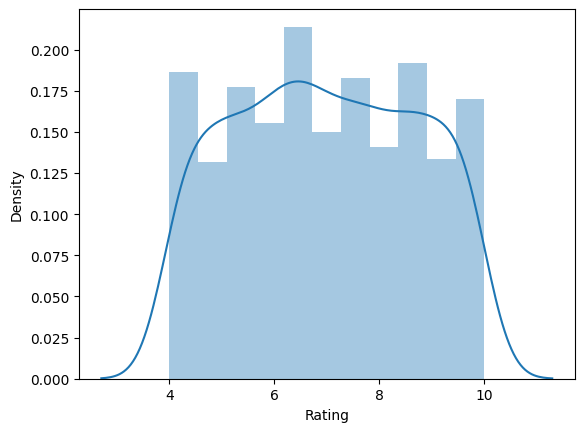

In [32]:
sns.distplot(df["Rating"])

Since distplot is getting deprecated, let's translate what distplot does with a more elaborate histplot. in case the code above breaks in the future

<Axes: xlabel='Rating', ylabel='Density'>

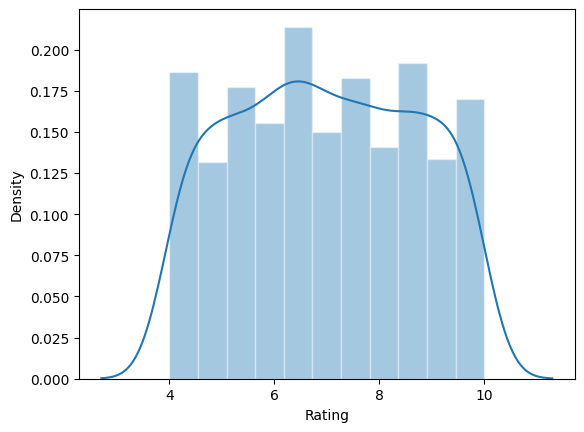

In [33]:
sns.histplot(df["Rating"], kde=True,
             stat="density", kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4),
             )

In [34]:
# Custom formula to replicate distplot
def custom_distplot(data, **kwargs):
    sns.histplot(data, kde=True, stat="density", kde_kws=dict(cut=3),
                 alpha=.4, edgecolor=(1, 1, 1, .4), **kwargs)

Let's add the mean to the histplot, or (distplot)

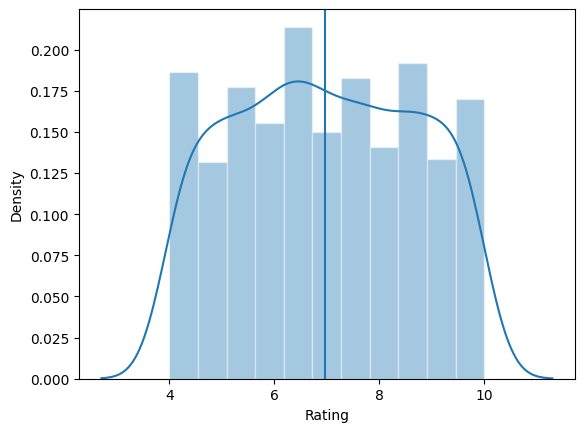

In [35]:
custom_distplot(df["Rating"])
plt.axvline(x=np.mean(df["Rating"]))

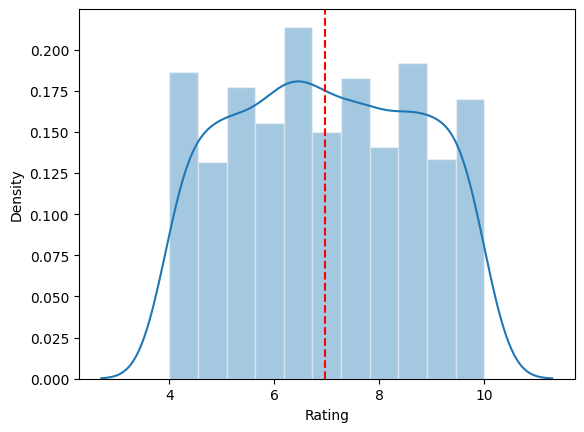

In [36]:
# let's style it a bit more
custom_distplot(df["Rating"])
plt.axvline(x=np.mean(df["Rating"]), c="red", ls="--")

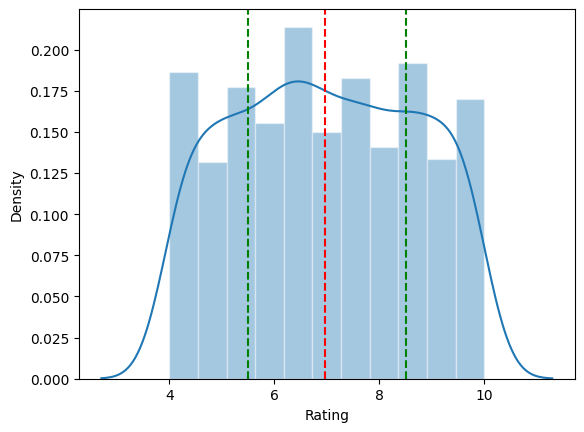

In [37]:
# Let's plot the 25 and 75 percentiles as well (quantiles)
# let's style it a bit more
custom_distplot(df["Rating"])
plt.axvline(x=np.mean(df["Rating"]), c="red", ls="--")
plt.axvline(x=np.percentile(df["Rating"],25), c="green", ls="--")
plt.axvline(x=np.percentile(df["Rating"],75), c="green", ls="--")

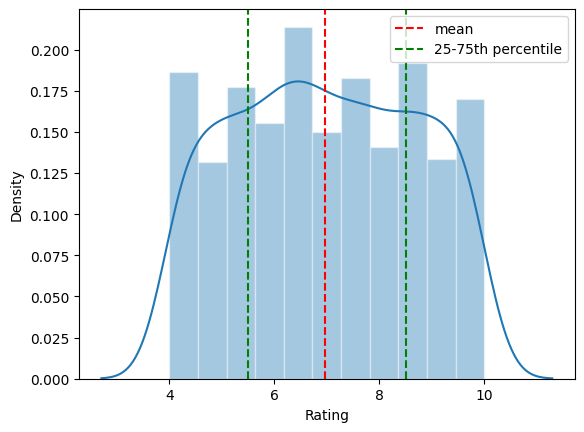

In [38]:
# Let's give them labels
custom_distplot(df["Rating"])
plt.axvline(x=np.mean(df["Rating"]), c="red", ls="--", label="mean")
plt.axvline(x=np.percentile(df["Rating"],25), c="green", ls="--", label="25-75th percentile")
plt.axvline(x=np.percentile(df["Rating"],75), c="green", ls="--")
plt.legend()

ANSWER: Distribution of user ratings looks fairly uniform and doesn't seem to be skewed on left or right direction

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'cogs'}>],
       [<Axes: title={'center': 'gross margin percentage'}>,
        <Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

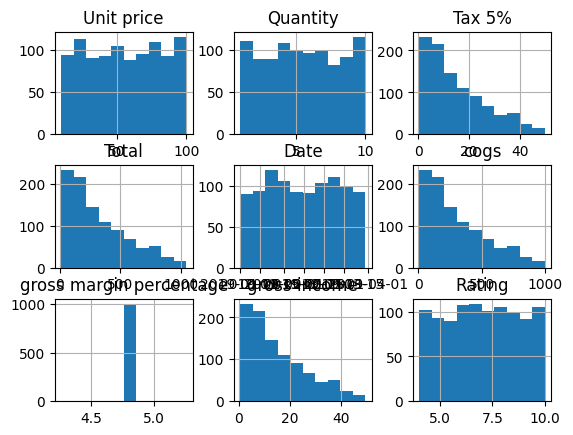

In [39]:
# Easy way to plot all variables at once:
df.hist()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'cogs'}>],
       [<Axes: title={'center': 'gross margin percentage'}>,
        <Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

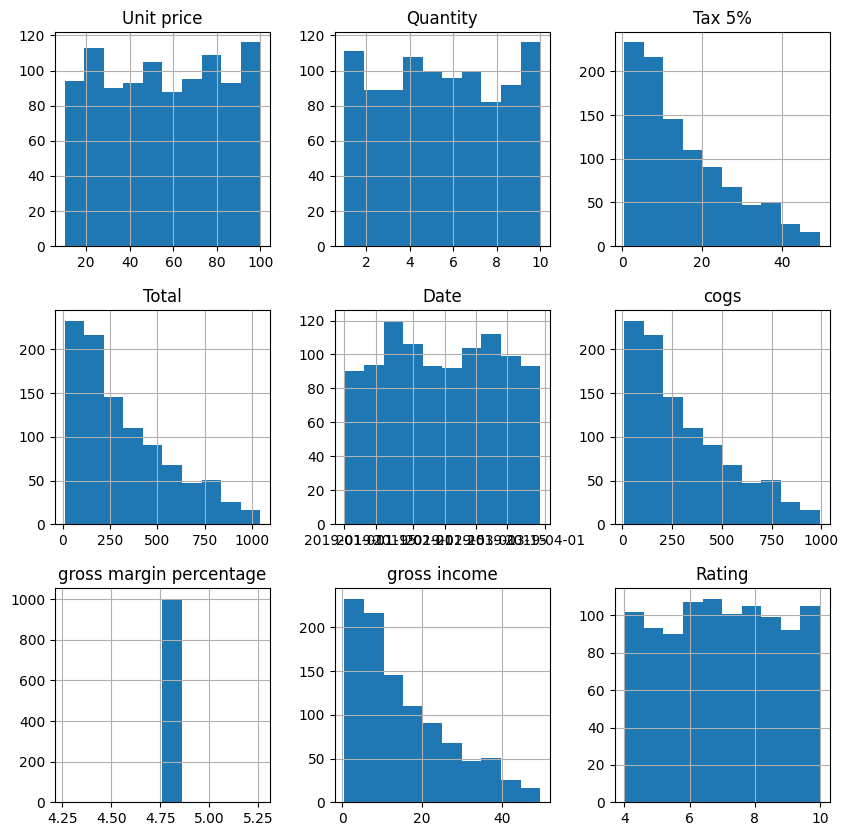

In [40]:
# Looks a bit messed up, so let's resize using figsize
df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

<Axes: xlabel='Branch', ylabel='count'>

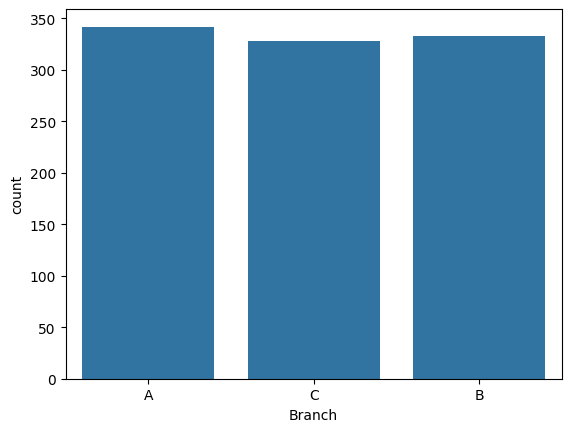

In [41]:
sns.countplot(x=df['Branch'])

In [42]:
df["Branch"].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

Not much, let's keep exploring. What about what payments are used more?

<Axes: xlabel='Payment', ylabel='count'>

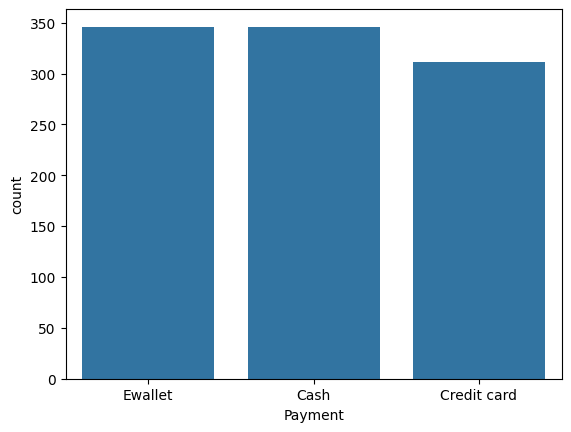

In [43]:
sns.countplot(x=df["Payment"])

In [44]:
df["Payment"].value_counts()

Payment
Ewallet        346
Cash           346
Credit card    311
Name: count, dtype: int64

We see Ewallet has mroe transactions, followed by cash, and finally credit-card. Surprisingly enough.  

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

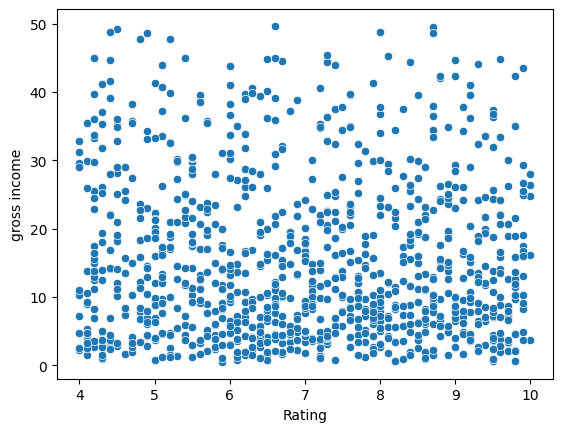

In [45]:
sns.scatterplot(x=df["Rating"], y=df["gross income"])

<Axes: xlabel='Rating', ylabel='gross income'>

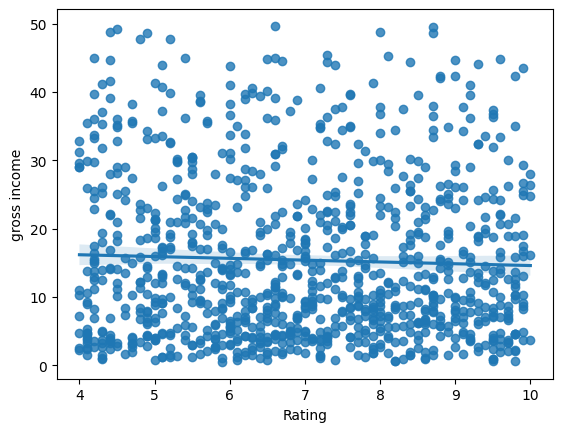

In [46]:
# Can't see any noticeable relationship. We can try doing a regression plot
sns.regplot(x="Rating", y="gross income", data=df)

Trendline looks pretty flat, so doesn't seem to be any relationship

Makes us wonder, if there are relationships between branch and gross income

Let's do a boxplot for quick look

<Axes: xlabel='Branch', ylabel='gross income'>

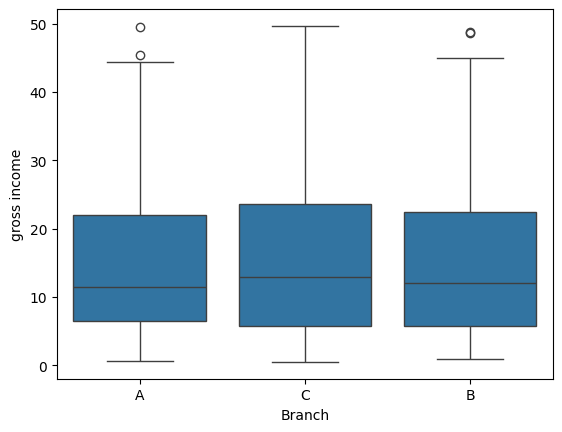

In [47]:
sns.boxplot(x="Branch", y="gross income", data=df)

Doesn't seem to be much of a relationship, except Branch C having a slightly higher mean gross income.

<Axes: xlabel='Gender', ylabel='gross income'>

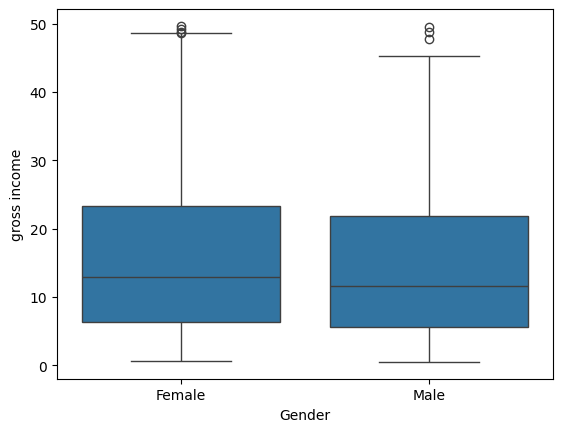

In [48]:
# Let's check if there's relationship between gender and gross income
sns.boxplot(x="Gender", y="gross income", data=df)

Looks like men and women spend about the same. But on the higher percentile there's slight difference

**Question 4:** Is there a noticeable time trend in gross income?

In [31]:
# This didn't work df.groupby(df.index).mean().index

In [49]:
# Note we can't use data frame in this particular plot because dates are repeated, 
# So we need to aggregate data

# first use date as index in df
date_indexed_df = df.set_index("Date", inplace=False)

# Select only numeric columns (excluding Date)

numeric_df = date_indexed_df.select_dtypes(include="number")

# Group by the index (date) and calculate the mean
grouped_df = numeric_df.groupby(numeric_df.index).mean()
grouped_df.head()

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333

In [50]:
# now we can do a lineplot, but...
# sns.lineplot(x=grouped_df)
# will not work because it's an entire data frame
# We need the index.
numeric_df.groupby(numeric_df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<Axes: xlabel='Date', ylabel='gross income'>

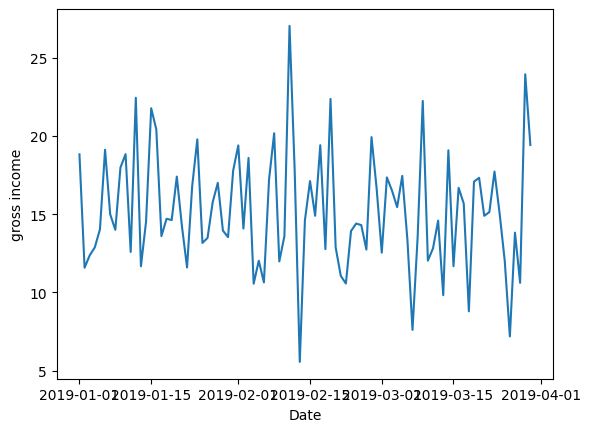

In [51]:
# Now we can plot the index on the x-axis and the gross income on the y-axis
sns.lineplot(x=numeric_df.groupby(numeric_df.index).mean().index,
            y=numeric_df.groupby(numeric_df.index).mean()["gross income"])

We don't see any obvious pattern, it might be because we only have 3 months of data. 

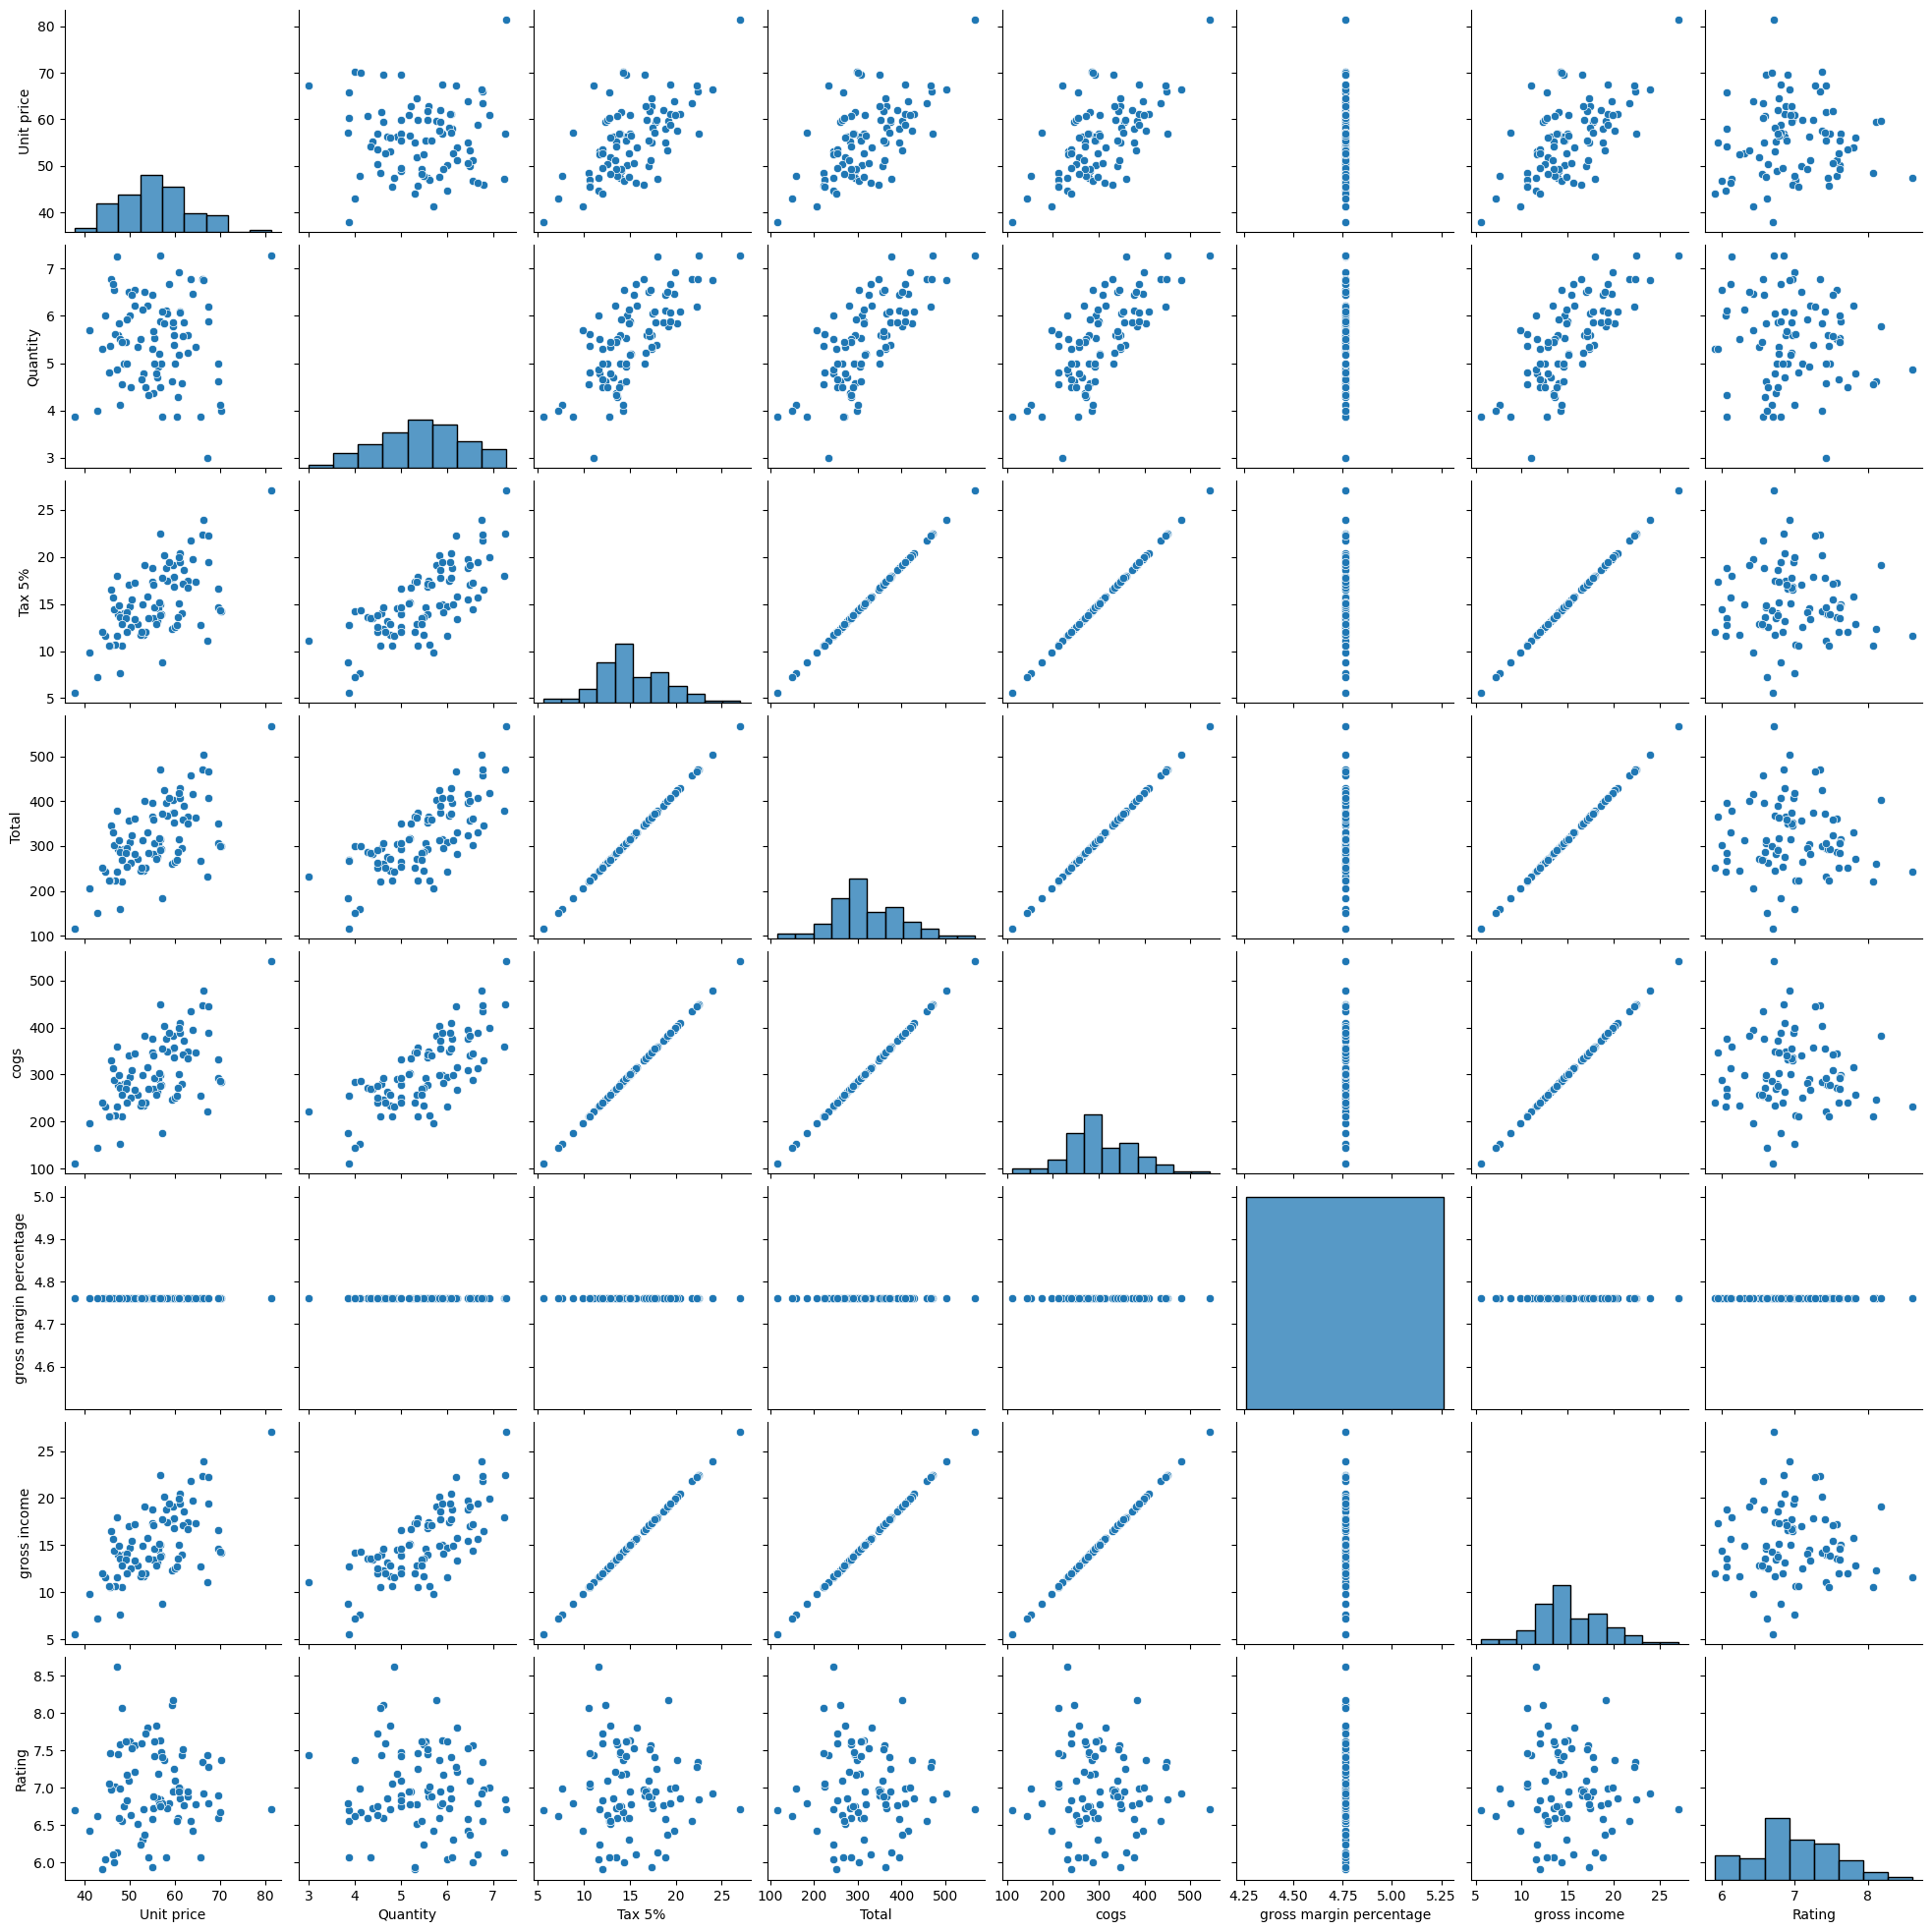

In [54]:
# lets plot all the bivariate relationships possible
sns.pairplot(grouped_df)

# not recommended for larger datasets because it's plotting all possible bi-variate combinations

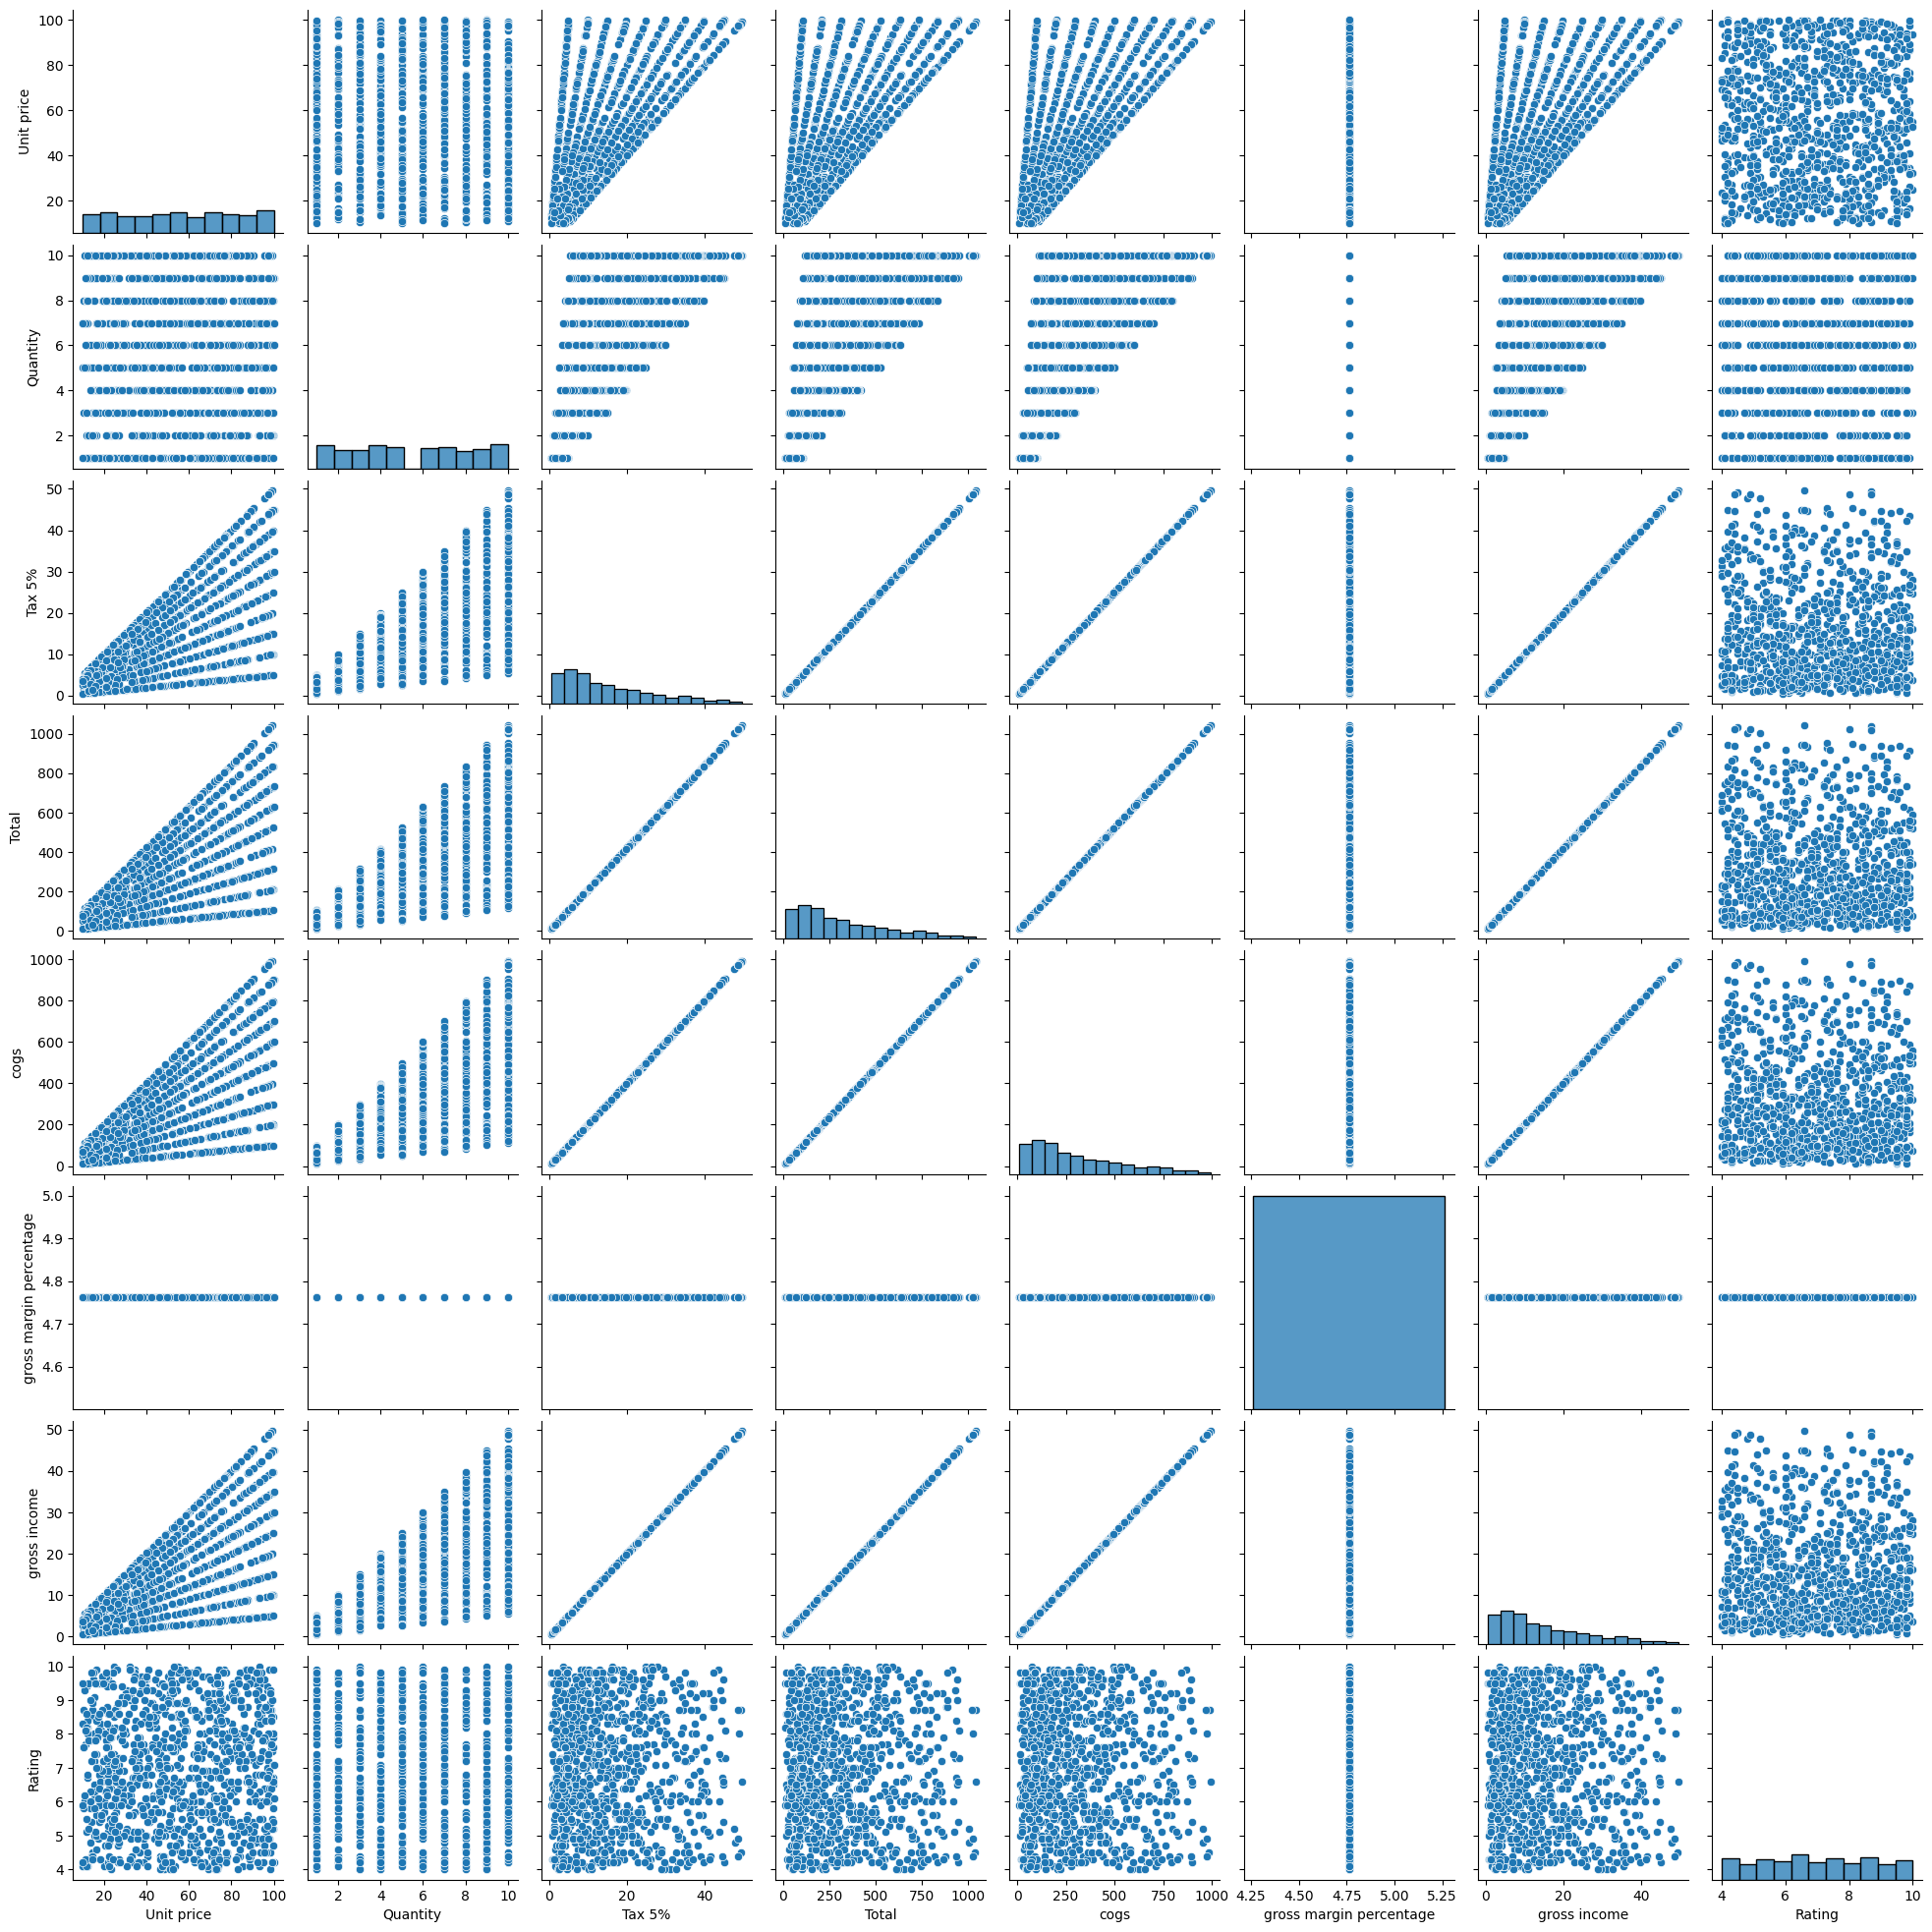

In [56]:
# Let's check something else, reseting the index of our original dataframe and seeing how that plots out.
new_df = df.reset_index(drop=True, inplace=False)
sns.pairplot(new_df)


### Task 4: Dealing With Duplicate Rows and Missing Values

Let's remove duplicated values from original data frame

In [67]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000     True
1001     True
1002     True
Length: 1003, dtype: bool

We can see the bottom 3 rows are duplicated. Let's see the total with a sum()


In [68]:
df.duplicated().sum()

3

In [69]:
# Let's remove all duplicates, and set inplace=True to update existing data frame
df.drop_duplicates(inplace=True)

In [94]:
# Let's check duplicates are gone:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000     True
1001     True
1002     True
Length: 1003, dtype: bool

Now let's deal with missing values

In [95]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [96]:
# Let's see what the percentage of missing values is for each missing value:

df.isna().sum() / len(df) * 100

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer type              7.876371
Gender                     0.000000
Product line               4.287139
Unit price                 0.697906
Quantity                   1.994018
Tax 5%                     0.000000
Total                      0.000000
Date                       0.000000
Time                       0.000000
Payment                    0.000000
cogs                       0.000000
gross margin percentage    0.000000
gross income               0.000000
Rating                     0.000000
dtype: float64

We see 7.9% Customer Type entries are missing

4.3% product line

0.6% unit price

1.9% Quantity 

Let's use seaborn to visualize it with a heatmap

<Axes: >

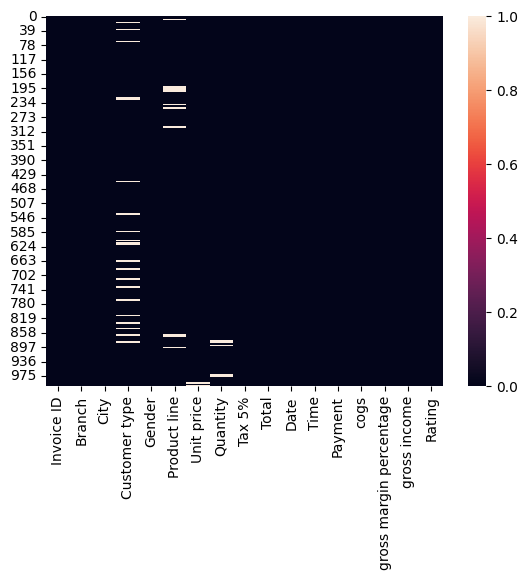

In [97]:
sns.heatmap(df.isnull())

What we see is the index on the left side, and the white lines are the values that are missing. 

Let's get rid of the color bars on the right with cbar=False

<Axes: >

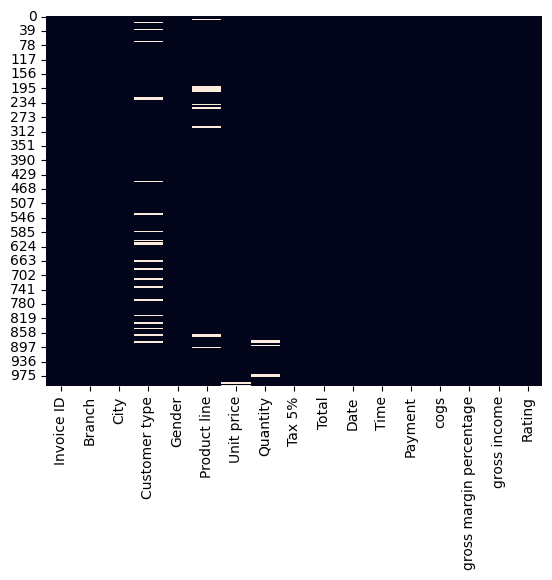

In [98]:
sns.heatmap(df.isnull(), cbar=False)

For our purposes, let's simplify the removal of these values. We can:

1) Fill date with 0 -> cons: skews the statistics
2) Fill data with the mean cons: if many outliers, this will skew the data, variability will be altered, and potential information loss
3) Remove the data?

In [99]:
# Let's fill the data with 0
# df.fillna(0)
# instead for replacing Na with mean you would do this:
# df.fillna(df.mean(), inplace=True)
# however, note that because there are non-numeric columns this will give error...

# so first have to set only numeric values... 
# Select only numeric columns with select_dtypes(include=[np.number])
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# Fill NaN values in numeric columns with the mean
# df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


# Alternatively we can Calculate the mean for numerical columns with
numeric_df = df.select_dtypes(include=np.number)
mean = numeric_df.mean()
df.fillna(mean, inplace=True)



Now let's visualize the data again

<Axes: >

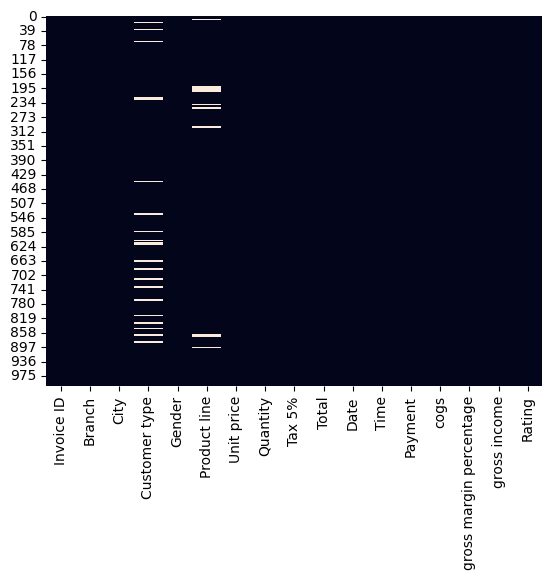

In [100]:
sns.heatmap(df.isnull(), cbar=False)

Now we see only the non-numeric columns are missing data

Now, let's replace the non-numeric missing values with the mode for those particular columns

Let's check the df.mode()

In [102]:
df.mode()

Invoice ID Branch    City Customer type  Gender         Product line  \
0   452-04-8808      A  Yangon        Normal  Female  Fashion accessories   
1   745-74-0715    NaN     NaN           NaN     NaN                  NaN   
2   849-09-3807    NaN     NaN           NaN     NaN                  NaN   
3           NaN    NaN     NaN           NaN     NaN                  NaN   
4           NaN    NaN     NaN           NaN     NaN                  NaN   
5           NaN    NaN     NaN           NaN     NaN                  NaN   
6           NaN    NaN     NaN           NaN     NaN                  NaN   
7           NaN    NaN     NaN           NaN     NaN                  NaN   
8           NaN    NaN     NaN           NaN     NaN                  NaN   
9           NaN    NaN     NaN           NaN     NaN                  NaN   
10          NaN    NaN     NaN           NaN     NaN                  NaN   
11          NaN    NaN     NaN           NaN     NaN                  NaN   
12          NaN    NaN     NaN           NaN     NaN                  NaN   

    Unit price  Quantity   Tax 5%     Total       Date   Time  Payment  \
0    55.764568      10.0   4.1540   87.2340 2019-02-07  14:42     Cash   
1          NaN       NaN   4.4640   93.7440        NaT  19:48  Ewallet   
2          NaN       NaN   5.8030  121.8630        NaT    NaN      NaN   
3          NaN       NaN   8.3770  175.9170        NaT    NaN      NaN   
4          NaN       NaN   9.0045  189.0945        NaT    NaN      NaN   
5          NaN       NaN  10.3260  216.8460        NaT    NaN      NaN   
6          NaN       NaN  10.3635  217.6335        NaT    NaN      NaN   
7          NaN       NaN  12.5700  263.9700        NaT    NaN      NaN   
8          NaN       NaN  13.1880  276.9480        NaT    NaN      NaN   
9          NaN       NaN  22.4280  470.9880        NaT    NaN      NaN   
10         NaN       NaN  30.4780  640.0380        NaT    NaN      NaN   
11         NaN       NaN  30.9190  649.2990        NaT    NaN      NaN   
12         NaN       NaN  39.4800  829.0800        NaT    NaN      NaN   

      cogs  gross margin percentage  gross income  Rating  
0    83.08                 4.761905        4.1540     6.0  
1    89.28                      NaN        4.4640     NaN  
2   116.06                      NaN        5.8030     NaN  
3   167.54                      NaN        8.3770     NaN  
4   180.09                      NaN        9.0045     NaN  
5   206.52                      NaN       10.3260     NaN  
6   207.27                      NaN       10.3635     NaN  
7   251.40                      NaN       12.5700     NaN  
8   263.76                      NaN       13.1880     NaN  
9   448.56                      NaN       22.4280     NaN  
10  609.56                      NaN       30.4780     NaN  
11  618.38                      NaN       30.9190     NaN  
12  789.60                      NaN       39.4800     NaN

df.mode() returns a whole data frame, but we just need the first row

So we can try iloc[0] which would return the 0 index location

In [113]:
df.mode().iloc[0]

Invoice ID                         452-04-8808
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.764568
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Date                       2019-02-07 00:00:00
Time                                     14:42
Payment                                   Cash
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [114]:
df.fillna(df.mode().iloc[0], inplace=True)

In [117]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<Axes: >

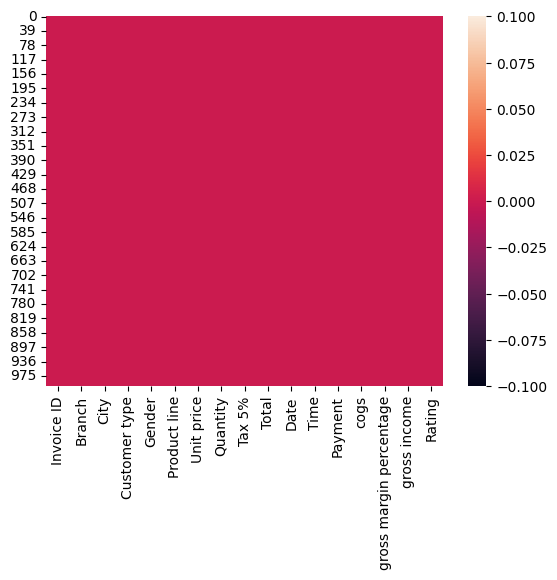

In [121]:
sns.heatmap(df.isnull())

Now all our empty cells are gone! Boom!

### Pandas Profiling Package:

Now let's look at something that can streamline all we've done

In [123]:
dataset = pd.read_csv("supermarket_sales.csv")
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

It takes some time, so if you have a large data set, this isn't very feasible. Ideally you have high computing power, and manageable data set.

### Task 5: Correlation Analysis

When we want to find correlation, we can use NumPy

In [129]:
# Let's get the numeric values and run a correlation on that
num_df = df.select_dtypes(include=np.number)

np.corrcoef(num_df["gross income"], num_df["Rating"])

array([[ 1.       , -0.0385905],
       [-0.0385905,  1.       ]])

we notice it's not a significant correlation (-0.0385)

Let's subset it to get a specific number from this

In [130]:
np.corrcoef(num_df["gross income"], num_df["Rating"])[1][0]

-0.038590501339494036

In [131]:
# Let's round it 
round(np.corrcoef(num_df["gross income"], num_df["Rating"])[1][0], 2)

-0.04

It will be quite tedious to do this for every pair-wise combination of columns, so let's just look at the correlation matrix instead

In [132]:
num_df.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.015383  0.629984  0.629984  0.629984   
Quantity                   0.015383  1.000000  0.703696  0.703696  0.703696   
Tax 5%                     0.629984  0.703696  1.000000  1.000000  1.000000   
Total                      0.629984  0.703696  1.000000  1.000000  1.000000   
cogs                       0.629984  0.703696  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.629984  0.703696  1.000000  1.000000  1.000000   
Rating                    -0.007870 -0.022586 -0.038591 -0.038591 -0.038591   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.629984 -0.007870  
Quantity                                     NaN      0.703696 -0.022586  
Tax 5%                                       NaN      1.000000 -0.038591  
Total                                        NaN      1.000000 -0.038591  
cogs                                         NaN      1.000000 -0.038591  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.038591  
Rating                                       NaN     -0.038591  1.000000

In [133]:
# Let's round the numbers to 2 decimal places
np.round(num_df.corr(), 2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.02    0.63   0.63  0.63   
Quantity                       0.02      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<Axes: >

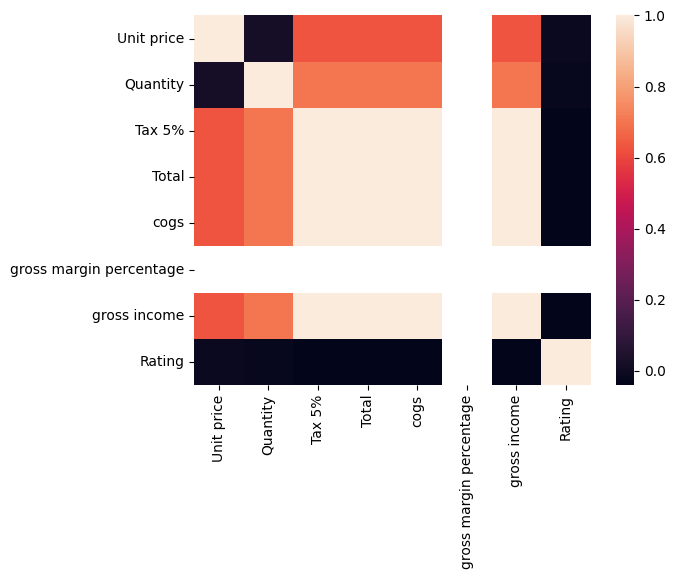

In [136]:
# Let's visualize with seaborn's heatmap
sns.heatmap(np.round(num_df.corr(), 2))

<Axes: >

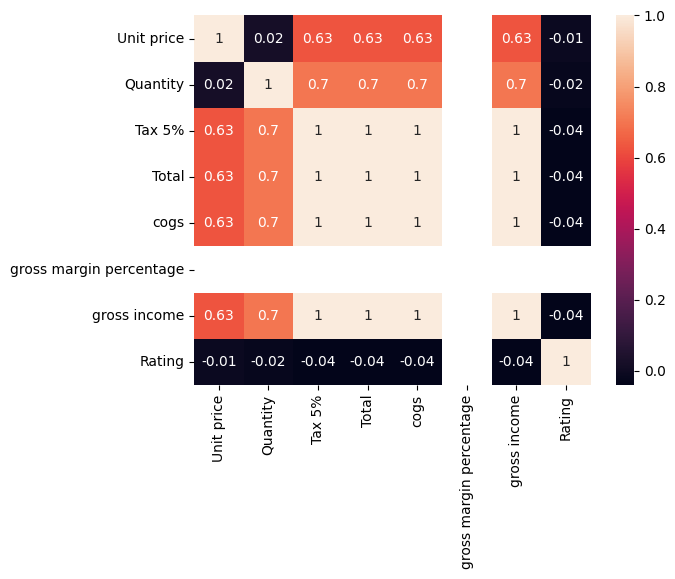

In [139]:
# Let's annotate
sns.heatmap(np.round(num_df.corr(), 2), annot=True)

Take-aways:

1) Interesting to see Rating low correlation with every other variable in data set
2) COGS and unit price is 63% 

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/